## Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pickle
model = load_model('model-5x5(10_epochs).h5')

In [3]:
model = load_model('model-5x5(10_epochs).h5')

## *Preprocessing*

In [4]:
with open('traffic_dataset/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [5]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([ 9, 37, 31, ...,  5, 18,  6], dtype=uint8),
 'x_validation': array([[[[-8.13200548e-02, -1.05785601e-01, -1.35571063e-01, ...,
           -1.33438379e-01, -1.00064300e-01, -8.01314786e-02],
          [-1.00652181e-01, -1.28710032e-01, -1.57822788e-01, ...,
           -1.62547588e-01, -1.36362046e-01, -1.08473681e-01],
          [-1.25605583e-01, -1.61946893e-01, -1.91582799e-01, ...,
           -1.84833080e-01, -1.58809453e-01, -1.29200697e-01],
          ...,
          [-8.20988938e-02, -1.09976135e-01, -1.44535631e-01, ...,
           -1.41712368e-01, -6.55412525e-02,  6.91929460e-03],
          [-6.42771199e-02, -8.87806639e-02, -1.19311996e-01, ...,
           -1.14659391e-01, -1.05807483e-02,  7.35892355e-02],
          [-4.32938561e-02, -6.82745054e-02, -8.79732892e-02, ...,
           -7.85297081e-02,  5.03404289e-02,  1.38326406e-01]],
 
         [[-8.57955888e-02, -1.09240018e-01, -1.37785345

### Encoding categorical data

In [6]:
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

In [7]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'x_validation': array([[[[-8.13200548e-02, -1.05785601e-01, -1.35571063e-01, ...,
           -1.33438379e-01, -1.00064300e-01, -8.01314786e-02],
          [-1.00652181e-01, -1.28710032e-01, -1.57822788e-01, ...,
           -1.62547588e-01, -1.36362046e-01, -1.08473681e-01],
          [-1.25605583e-01, -1.61946893e-01, -1.91582799e-01, ...,
           -1.84833080e-01, -1.58809453e-01, -1.29200697e-01],
          ...,
          [-8.20988938e-02, -1.09976135e-01, -1.44535631e-01, ...,
           -1.41712368e-01, -6.55412525e-02,  6.91929460e-03],
          [-6.42771199e-02, -8.87806639e-02, -1.19311996e-01, ...,
           -1.14659391e-01, -1.05807483e

In [8]:
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

In [9]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'x_validation': array([[[[-8.13200548e-02, -8.57955888e-02, -8.89664665e-02],
          [-1.05785601e-01, -1.09240018e-01, -1.12112112e-01],
          [-1.35571063e-01, -1.37785345e-01, -1.44440144e-01],
          ...,
          [-1.33438379e-01, -1.35192156e-01, -1.41125023e-01],
          [-1.00064300e-01, -1.06659241e-01, -1.13051407e-01],
          [-8.01314786e-02, -8.77720937e-02, -9.07515064e-02]],
 
         [[-1.00652181e-01, -1.08288847e-01, -1.11199073e-01],
          [-1.28710032e-01, -1.35098189e-01, -1.41694248e-01],
          [-1.57822788e-01, -1.62922800e-01, -1.73192650e-01],
          ...,
          [-1.62547588e-01, -1.67186618e-0

### Dimensions of train, test, validation sets

From this we notice:
- all images are of size 32x32
- there are 43 distinct traffic sign types
- there are 86,989 (~87,000) images in the training set
- there are 12,630 images in the test set
- ratio of training:test size is 87%
- there are 4,410 images in the validation set

In [10]:
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


# Visualizing the Data

<div style="text-decoration: underline; font-size: 16px">Changing default rc settings of matplotlib plots</div>

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5) # Setting default size of plots

In [12]:
# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list

labels = label_text('traffic_dataset/label_names.csv')

Display 10 random images from the training set as well as their labels

In [13]:
visualize_num=10

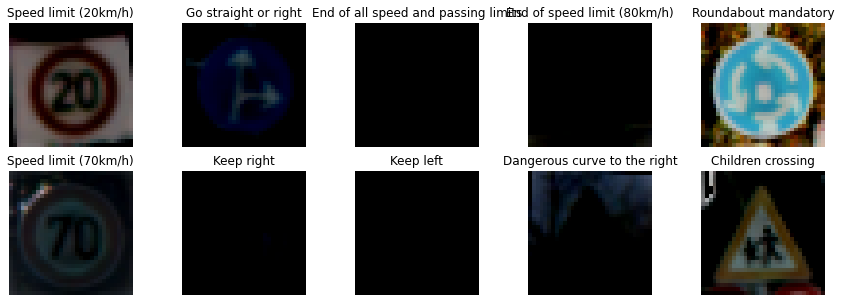

In [14]:
%%capture --no-display
indices = np.random.randint(low = 0, high = 12629, size = visualize_num) # get 10 random numbers

x_input_lst = []
y_input_lst = []

for num, param in enumerate(indices):
    x_input = data['x_train'][param: (param + 1)]
    y_input = data['y_train'][param : (param + 1)]
    
    x_input_lst.append(x_input)
    y_input_lst.append(y_input)
    
    plt.subplot(2, 5, num+1)
    plt.imshow(x_input[0, :, :, :])
    plt.title(format(labels[np.where(y_input==1)[1][0]])) # display the label above the image
    plt.axis('off')
plt.show()

## Building the CNN

In [15]:
filters = [3, 5, 7, 9, 11, 13] #, 15, 19, 23, 25, 31
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    # images are of size 32x32, 3 channels for RGB
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    # output size = 43 (matches the number of different types of traffic signs)
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 10
h = [0] * len(model)
for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'][:10000], data['y_train'][:10000],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer])

Epoch 1/10
2000/2000 [==============================] - 113s 56ms/step - loss: 2.4181 - accuracy: 0.3588 - val_loss: 1.0133 - val_accuracy: 0.7313
Epoch 2/10
2000/2000 [==============================] - 95s 47ms/step - loss: 0.5516 - accuracy: 0.8528 - val_loss: 0.8279 - val_accuracy: 0.7719
Epoch 3/10
2000/2000 [==============================] - 89s 44ms/step - loss: 0.2725 - accuracy: 0.9293 - val_loss: 0.8925 - val_accuracy: 0.7957
Epoch 4/10
2000/2000 [==============================] - 87s 43ms/step - loss: 0.1749 - accuracy: 0.9556 - val_loss: 0.7563 - val_accuracy: 0.8202
Epoch 5/10
2000/2000 [==============================] - 85s 42ms/step - loss: 0.1329 - accuracy: 0.9641 - val_loss: 0.8261 - val_accuracy: 0.8277
Epoch 6/10
2000/2000 [==============================] - 88s 44ms/step - loss: 0.0925 - accuracy: 0.9747 - val_loss: 0.8181 - val_accuracy: 0.8270
Epoch 7/10
2000/2000 [==============================] - 101s 51ms/step - loss: 0.0743 - accuracy: 0.9834 - val_loss: 1.1325

2000/2000 [==============================] - 97s 49ms/step - loss: 0.1383 - accuracy: 0.9587 - val_loss: 1.6629 - val_accuracy: 0.7274
Epoch 7/10
2000/2000 [==============================] - 101s 51ms/step - loss: 0.1261 - accuracy: 0.9650 - val_loss: 1.5155 - val_accuracy: 0.7685
Epoch 8/10
2000/2000 [==============================] - 107s 54ms/step - loss: 0.0971 - accuracy: 0.9720 - val_loss: 1.3256 - val_accuracy: 0.7871
Epoch 9/10
2000/2000 [==============================] - 108s 54ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 1.2825 - val_accuracy: 0.7859
Epoch 10/10
2000/2000 [==============================] - 108s 54ms/step - loss: 0.0712 - accuracy: 0.9824 - val_loss: 1.5777 - val_accuracy: 0.7746


In [17]:
h

### Textual Summary of results

In [18]:
for i in range(len(h)):
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, \
validation accuracy={3:.5f}, validation loss={4:.5f}'.format(filters[i], epochs, max(h[i].history['accuracy']),
                                                            max(h[i].history['val_accuracy']), max(h[i].history['val_loss'])))

Model with filters 3x3, epochs=10, training accuracy=0.99040, validation accuracy=0.83061, validation loss=1.14897
Model with filters 5x5, epochs=10, training accuracy=0.99080, validation accuracy=0.86100, validation loss=1.12324
Model with filters 7x7, epochs=10, training accuracy=0.98910, validation accuracy=0.84308, validation loss=1.20473
Model with filters 9x9, epochs=10, training accuracy=0.99020, validation accuracy=0.82404, validation loss=1.25463
Model with filters 11x11, epochs=10, training accuracy=0.98290, validation accuracy=0.81655, validation loss=1.59503
Model with filters 13x13, epochs=10, training accuracy=0.98050, validation accuracy=0.78707, validation loss=1.66294


<br></br>
## Plotting Accuracy of Models

Plot the Training and Validation Accuracy of the 6 different models to determine which filter size results in the greatest accuracy (for 10 epochs)

<div style="text-decoration: underline; font-size: 16px">Changing default rc settings of matplotlib plots</div>

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Helvetica' # Set default font family

<div style="text-decoration: underline; font-size: 16px">Plotting Accuracy Between Models with different filter sizes</div>

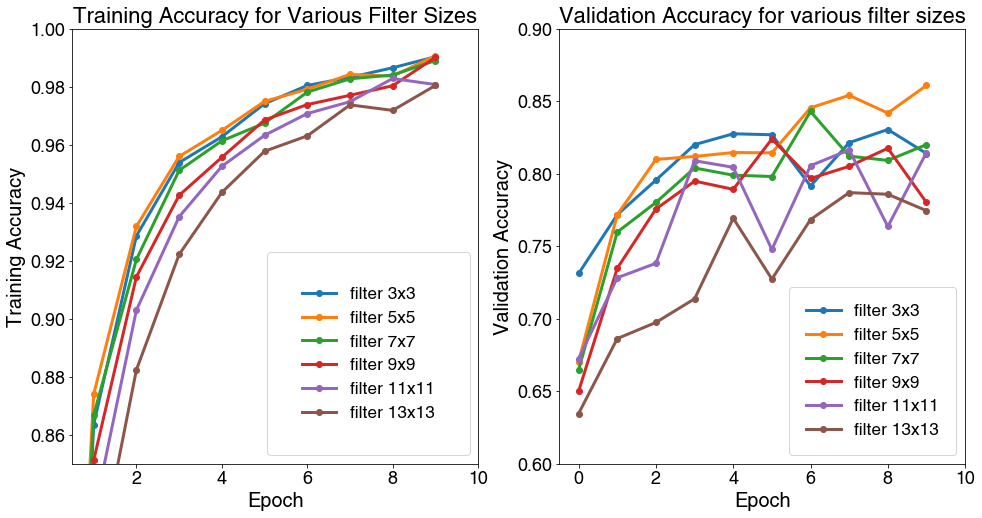

In [20]:
fig = plt.figure()

# -----plot 1: Comparing Training Accuracy Between the 6 Models-----
plt.subplot(1, 2, 1)

for i in range(len(h)):
    plt.plot(h[i].history['accuracy'], '-o', linewidth = 3)
    
plt.legend(['filter 3x3', 'filter 5x5', 'filter 7x7', 'filter 9x9', 'filter 11x11', 'filter 13x13'],
          loc = 'lower right', fontsize = 'xx-large', borderpad = 2)

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Training Accuracy', fontsize = 20)

plt.ylim(0.85, 1.0)
plt.xlim(0.5, 10)

plt.title('Training Accuracy for Various Filter Sizes', fontsize = 22)

plt.tick_params(labelsize = 18)


# -----plot 2: Comparing Validation Accuracy Between the 6 Models-----
plt.subplot(1, 2, 2)

for i in range(len(h)):
    plt.plot(h[i].history['val_accuracy'], '-o', linewidth = 3)
    
plt.legend(['filter 3x3', 'filter 5x5', 'filter 7x7', 'filter 9x9', 'filter 11x11', 'filter 13x13'],
          loc = 'lower right', fontsize = 'xx-large', borderpad = 1)
plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Validation Accuracy', fontsize = 20)

plt.ylim(0.6, 0.9)
plt.xlim(-0.5, 10)

plt.title('Validation Accuracy for various filter sizes', fontsize = 22)

plt.tick_params(labelsize = 18)

From this we can observe that the **5x5 filter**, a.k.a model[1], attained the highest Training Accuracy (99.08%) as well as the highest Validation Accuracy (86.10%) at the end of 10 epochs. 

*Note that the 3x3 filter obtained the second highest Training Accuracy (99.04%) and, at one point, between 3 and 5 epochs, achieved the highest Validation Accuracy between all models, though other models overtook it from this point.*

From now on, we will be using the **5x5 filter**, a.k.a model[1].

<br></br>
## Calculating Accuracy using Test Set

In [21]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    # We compare predicted class with correct class for all input images
    # And calculating mean value among all values of following numpy array
    # By saying 'testing_accuracy == data['y_test']' we create numpy array with True and False values
    # 'np.mean' function will return average of the array elements
    # The average is taken over the flattened array by default
    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

data2 filter 3 testing accuracy = 0.83452
data2 filter 5 testing accuracy = 0.85582
data2 filter 7 testing accuracy = 0.84014
data2 filter 9 testing accuracy = 0.80428
data2 filter 11 testing accuracy = 0.83333
data2 filter 13 testing accuracy = 0.81045


<br></br>
## Predicting with the Best Model

In [22]:
test_num = 6

In [23]:
# Getting scores from forward pass of input image
scores = model[1].predict(x_input_lst[0])
print(scores[0].shape) # (43,)
print(scores) # display scores for each of the 43 possible types

(43,)
[[9.9999976e-01 2.7501065e-07 2.4310129e-10 9.2998902e-16 1.0591917e-08
  9.8794768e-09 4.3160431e-19 1.5137691e-10 2.3682608e-11 1.6444776e-19
  7.1879740e-20 3.6109188e-22 5.2695009e-26 4.1452718e-26 7.4446022e-20
  9.5461521e-14 1.0770185e-13 5.4929979e-18 4.6759742e-24 2.7556617e-20
  4.4306138e-27 9.6278814e-23 6.7473728e-29 9.5582586e-27 2.9437032e-25
  5.5877188e-34 2.2526719e-25 4.7040018e-27 1.8205495e-18 2.5188642e-24
  7.5063998e-27 2.9085264e-21 8.5391393e-16 1.7783571e-32 4.2528535e-29
  5.6933614e-20 3.0652423e-26 5.9284546e-27 4.7874751e-27 1.4012931e-28
  2.6592168e-21 1.6526939e-23 2.7807866e-18]]


In [24]:
plt.rcParams['figure.figsize'] = (10,10)

In [25]:
indices = np.random.randint(low = 0, high = 12629, size = test_num)

x_test_lst = []
y_test_lst = []

for num, param in enumerate(indices):
    x_test = data['x_test'][param: (param + 1)]
    y_test = data['y_test'][param : (param + 1)]
    
    x_test_lst.append(x_test)
    y_test_lst.append(y_test)

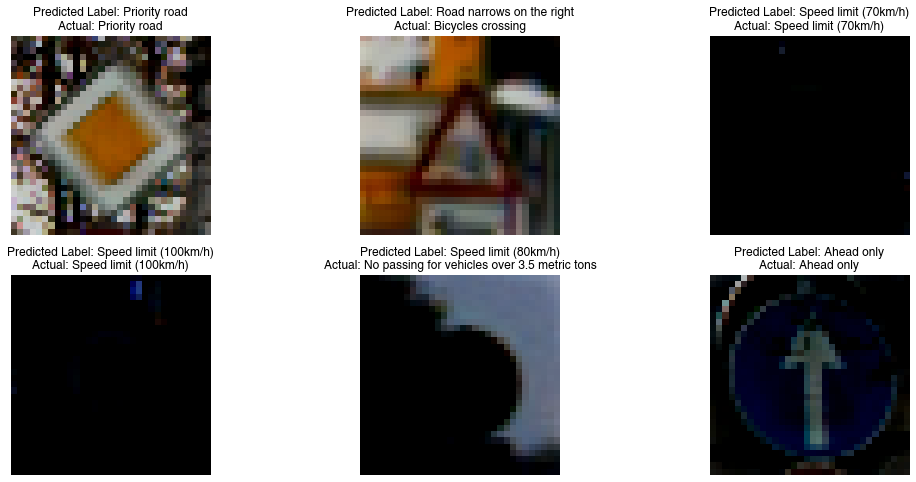

In [34]:
%%capture --no-display

classIds = []

for i in range(test_num):
    scores = model[1].predict(x_test_lst[i])
    
    prediction = np.argmax(scores)
    
    plt.subplot(4, 3, i+1)
    plt.imshow(x_test_lst[i][0, :, :, :])
    plt.axis('off')
    plt.title("Predicted Label: {}\nActual: {}".format(labels[prediction], labels[y_test_lst[i][0]]))
plt.subplots_adjust(right=1.5, top=1.4)
plt.show()

<br></br>
## Saving the Model

In [27]:
for i in range(len(model)):
    name = 'model-' + str(filters[i]) + 'x' + str(filters[i]) + '(10_epochs).h5'
    model[i].save(name)